In [ ]:
import os

use_drive = True #@param {type:"boolean"}
if use_drive:
  from google.colab import drive
  drive.mount('/content/drive')
  base_dir = '/content/drive/MyDrive/QuantumEpitopeCovid19Logs'
else:
  base_dir = '/content/QuantumEpitopeCovid19Logs'

use_gpu = True #@param {type:"boolean"}
gpu_type = "A100" #@param ["T4", "A100"]

Mounted at /content/drive


In [ ]:
#@title Download clean dataset from github
!git clone https://github.com/Herutriana44/QuantumCovid19EpitopePrediction

Cloning into 'QuantumCovid19EpitopePrediction'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 2.52 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
#@title Library Installation
!pip install pylatexenc -q
!pip install -r QuantumCovid19EpitopePrediction/requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
!pip install qiskit qiskit-machine-learning torch pandas scikit-learn qiskit-algorithms qiskit_ibm_runtime qiskit-aer-gpu -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#@title Simple solve error ```ImportError: cannot import name 'BackendV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)```
import os

directory = '/usr/local/lib/python3.11/dist-packages/qiskit/primitives'

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".py"):
            filepath = os.path.join(root, file)
            try:
                with open(filepath, 'r') as f:
                    content = f.read()

                # Remove the specified text
                new_content = content.replace('BackendV1, ', '')

                if new_content != content:
                    with open(filepath, 'w') as f:
                        f.write(new_content)
                    print(f"Modified: {filepath}")
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

print("Processing complete.")

Modified: /usr/local/lib/python3.11/dist-packages/qiskit/primitives/backend_sampler_v2.py
Modified: /usr/local/lib/python3.11/dist-packages/qiskit/primitives/backend_sampler.py
Modified: /usr/local/lib/python3.11/dist-packages/qiskit/primitives/backend_estimator_v2.py
Modified: /usr/local/lib/python3.11/dist-packages/qiskit/primitives/backend_estimator.py
Processing complete.


In [ ]:
#@title Import Library
import pandas as pd
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim

from qiskit_machine_learning.utils import algorithm_globals

from qiskit.circuit.library import ZZFeatureMap, TwoLocal, RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorSampler
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.primitives import BackendSamplerV2

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

In [ ]:
# documentation QiskitRuntimeService https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/qiskit-runtime-service
service = QiskitRuntimeService(channel="local", token="QUANTUM_IBM_CLOUD_AUTHTOKEN")

# for check backend open
# for backend in service.backends():
#     print(backend.name)

# implement ibm cloud and fake ibm cloud
# backend = service.backend("fake_osaka")
# sampler = BackendSamplerV2(backend=backend)

from qiskit_aer.primitives import Sampler as AerSampler

if use_gpu:
  if gpu_type == "T4":
    sampler = AerSampler()
    sampler.set_options(device='GPU', max_parallel_threads=2)
  elif gpu_type == "A100":
    sampler = AerSampler()
    sampler.set_options(
        device='GPU',
        max_parallel_threads=16,        # gunakan semua vCPU yang tersedia
        max_parallel_experiments=8,     # batch eksekusi circuit
        blocking_enable=True,            # sinkronisasi batch
    )
else:
  sampler = AerSampler()

# from qiskit.primitives import StatevectorSampler
# sampler = StatevectorSampler()

In [ ]:
#@title Load dataset
df = pd.read_csv("/content/QuantumCovid19EpitopePrediction/clean_amino_data.csv")
df = df.dropna()
df = df.reset_index(drop=True)
print(len(df))

348783


In [ ]:
# df['label'].value_counts().plot(kind='bar')

In [ ]:
# #@title Resample data based on 'label' column
# def resample_by_label(df, label_col, target_count_per_label):
#     """
#     Resamples the DataFrame to have a specified number of samples for each label.

#     Args:
#         df (pd.DataFrame): The input DataFrame.
#         label_col (str): The name of the column containing the labels.
#         target_count_per_label (int): The desired number of samples for each label.

#     Returns:
#         pd.DataFrame: The resampled DataFrame.
#     """
#     resampled_df = pd.DataFrame()
#     for label_value in df[label_col].unique():
#         label_df = df[df[label_col] == label_value]
#         # Use replace=True for oversampling if needed, or adjust if target_count_per_label > len(label_df)
#         resampled_label_df = label_df.sample(n=target_count_per_label, replace=False, random_state=42)
#         resampled_df = pd.concat([resampled_df, resampled_label_df])

#     # Shuffle the resampled data to mix the labels
#     resampled_df = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
#     return resampled_df

# # Resample the DataFrame to have 50 'E' and 50 '.' labels
# target_samples_per_label = 5000
# df_resampled = resample_by_label(df, 'label', target_samples_per_label)

# print(f"Original DataFrame length: {len(df)}")
# print(f"Resampled DataFrame length: {len(df_resampled)}")
# print("Value counts in resampled DataFrame:")
# print(df_resampled['label'].value_counts())

# # Update the original dataframe reference to the resampled one for subsequent steps
# df = df_resampled

In [ ]:
def label_to_numeric(str):
  if str == 'E':
    return 1
  else:
    return 0

In [ ]:
df['label_numeric'] = df['label'].apply(label_to_numeric)

In [ ]:
# all numeric column float to int
df['length_sequence'] = df['length_sequence'].astype(int)
df['Position'] = df['Position'].astype(int)

In [ ]:
#@title Define features and label
features = ['Position', 'length_sequence', 'numerical_amino_acid']
label = 'label_numeric'
X = df[features].values
y = df[label].values

In [ ]:
df.head()

,amino,label,Position,length_sequence,numerical_amino_acid,label_numeric
0,A,E,22,14,1,1
1,F,E,23,14,5,1
2,V,E,24,14,18,1
3,V,E,25,14,18,1
4,F,E,26,14,5,1


In [ ]:
len(df)

348783

In [ ]:
#@title Split data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
#@title Define Quantum Feature Map and Ansatz
num_qubits = X_train.shape[1]

feature_map = ZZFeatureMap(num_qubits, reps=2, entanglement="full")  # Feature Map
ansatz = RealAmplitudes(num_qubits, entanglement='full', reps=3)     # Ansatz

In [ ]:
#@title Save Quantum Circuits as images
# feature_map.draw(output='mpl')
# plt.savefig("feature_map_circuit.png")

# ansatz.draw(output='mpl')
# plt.savefig("ansatz_circuit.png")

In [ ]:
# feature_map.decompose().draw(output='mpl')

In [ ]:
# ansatz.decompose().draw(output='mpl')

In [ ]:
#@title Define Optimizer
optimizer = COBYLA(maxiter=100)

In [ ]:
#@title Define Quantum Classifier (VQC)
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, sampler=sampler)

In [ ]:
# VQC draw circuit
# vqc.circuit.decompose().draw(output='mpl')

In [ ]:
#@title Train Model with tqdm Progress Bar
import time

start_time = time.time()
print("Training VQC Model...")
vqc.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training VQC Model...
Training time: 59709.20 seconds


# slicing data & time
100 = 27.36 detik | 20.13 detik(versi vCPU=2) | 13.21 detik(A100, vCPU=16) <br>
1000 = 197.77 detik | | 125.26 detik(A100, vCPU=16) <br>
10000 = 2079.54 detik | | 1263.36 detik(A100, vCPU=16) | 650.39 detik <br>
full = 59709.20 detik(full rata kiri)

In [ ]:
#@title Predict
y_pred = vqc.predict(X_test)

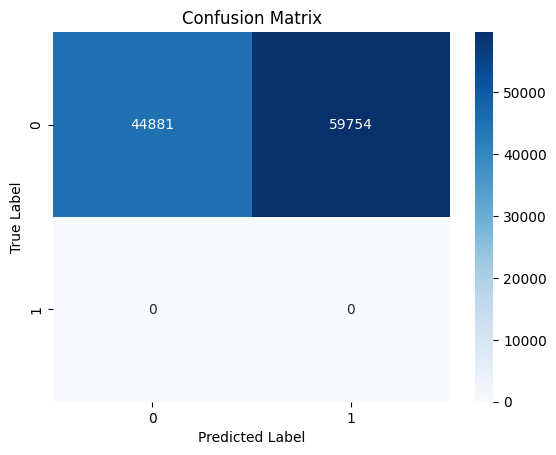

In [ ]:
#@title Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
if use_drive:
  plt.savefig(os.path.join(base_dir, "confusion_matrix.png"))
else:
  plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
#@title Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
if use_drive:
  with open(os.path.join(base_dir, "classification_report.json"), "w") as f:
    json.dump(report, f)
    print("Classification report saved to", os.path.join(base_dir, "classification_report.json"))
else:
  with open("classification_report.json", "w") as f:
    json.dump(report, f)
    print("Classification report saved to", "classification_report.json")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60    104635
           1       0.00      0.00      0.00         0

    accuracy                           0.43    104635
   macro avg       0.50      0.21      0.30    104635
weighted avg       1.00      0.43      0.60    104635



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# akurasi
penggunaan minmaxscaler(semua fitur) = 0.40 <br>
penggunaan minmaxscaler(kolom posisi saja) = 0.50 <br>
tanpa minmaxscaler = 0.57

In [ ]:
# #@title Save Model
# if use_drive:
#   joblib.dump(vqc, os.path.join(base_dir, "vqc_model.joblib"))
#   print("Model saved to", os.path.join(base_dir, "vqc_model.joblib"))
#   print("Training Complete. Files saved.")
# else:
#   joblib.dump(vqc, "vqc_model.joblib")
#   print("Model saved to", "vqc_model.joblib")

# print("Training Complete. Files saved.")